In [35]:
# Imports
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import peakutils 

In [36]:
from math import factorial
def savitzky_golay(y, window_size, order, deriv=0, rate=1):

    try:
        window_size = np.abs(np.int(window_size))
        order = np.abs(np.int(order))
    except (ValueError, msg):
        raise ValueError("window_size and order have to be of type int")
    if window_size % 2 != 1 or window_size < 1:
        raise TypeError("window_size size must be a positive odd number")
    if window_size < order + 2:
        raise TypeError("window_size is too small for the polynomials order")
    order_range = range(order+1)
    half_window = (window_size -1) // 2
    # precompute coefficients
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
    # pad the signal at the extremes with
    # values taken from the signal itself
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m[::-1], y, mode='valid')

## 410nm Graphs and Peak Difference

In [37]:
df = pd.read_csv('HD_5Angstroms_410.csv')
df.columns=['ds','nA']
df = df[df.ds > 180]
df = df.reset_index(drop = True)
df.ds = df.ds - df.ds[0]


In [46]:
yhat=savitzky_golay(np.asarray(df.nA),30001,3)
df['yhat'] = yhat

In [47]:
dfx = df[(df.ds < 40)]

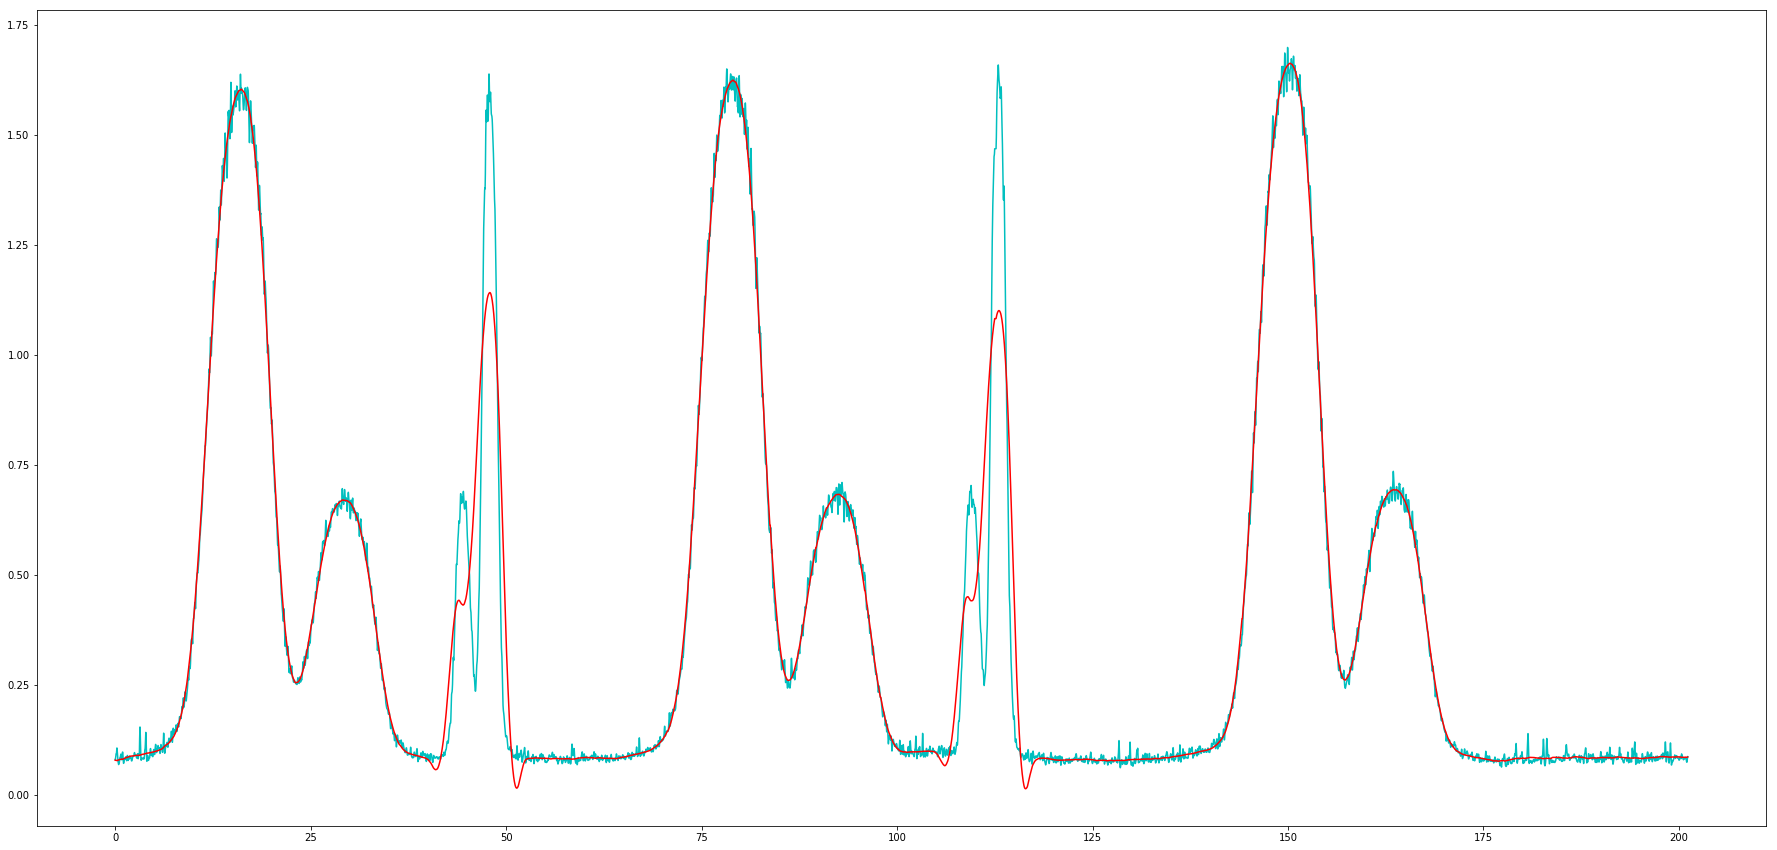

In [48]:
plt.figure(figsize=(31,15), facecolor='w')
plt.plot(df.ds, df.nA, 'c')
plt.plot(df.ds, yhat, 'r')
plt.show()

First Measurement

Find indexes where there is a peak using peakutil package

In [49]:
indexes = peakutils.indexes(yhat, thres=0.25, min_dist=10000)
xmax = [df.ds[i] for i in indexes]

In [50]:
print(indexes)

[ 80030 144500 218081 237776 391674 457949 539486 558374 742929 808202]


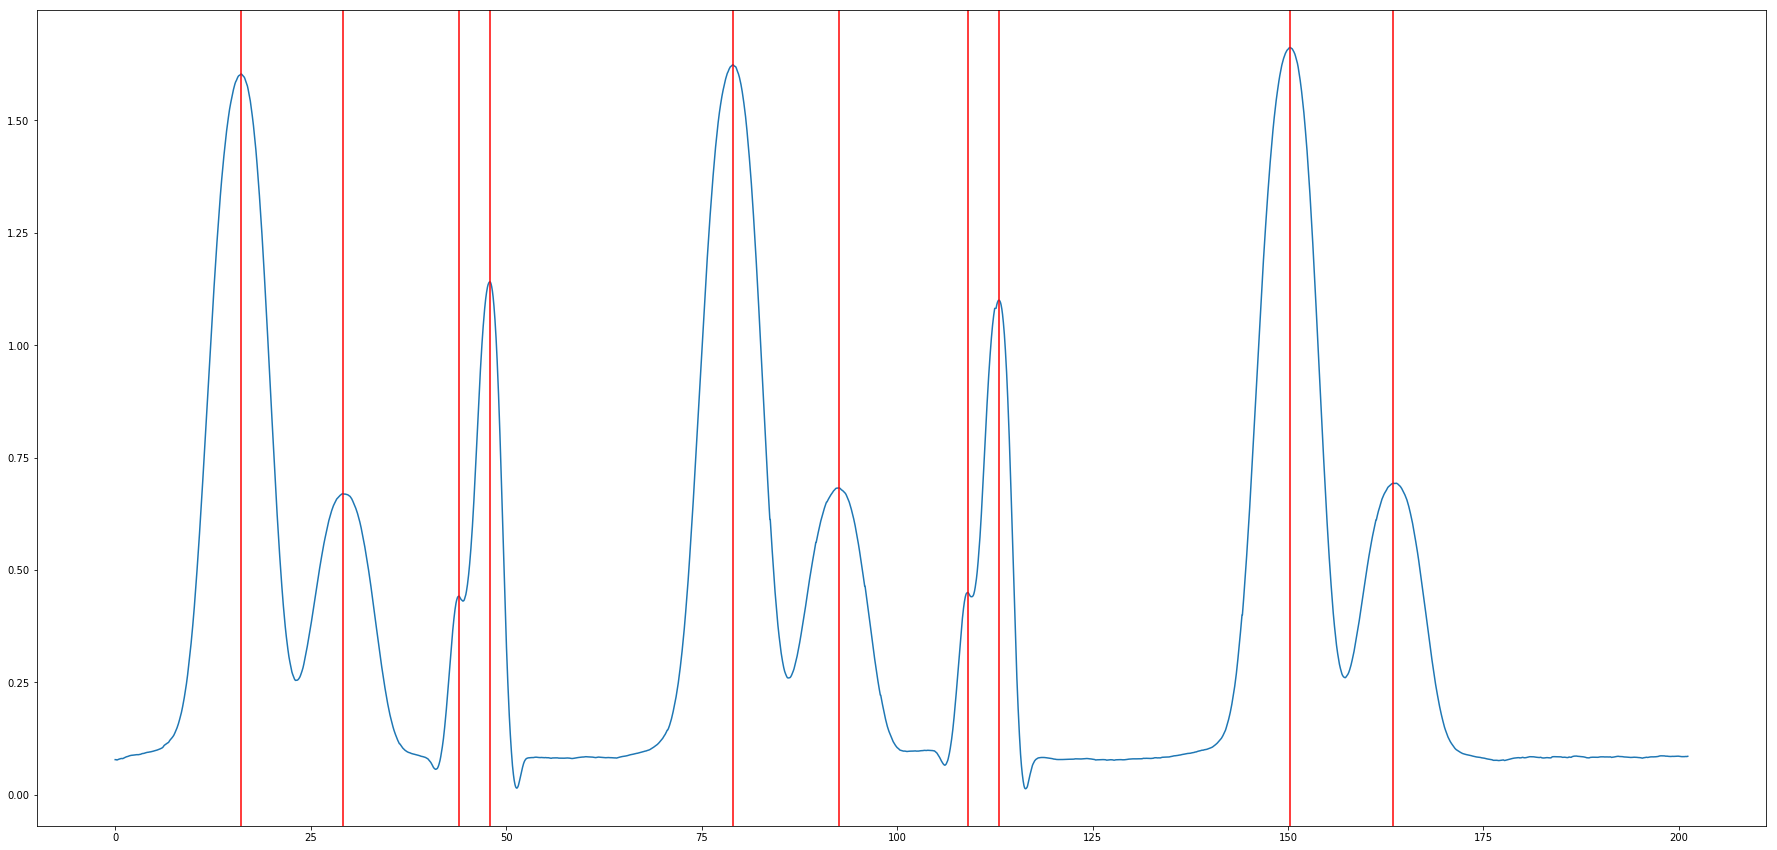

In [51]:
plt.figure(figsize=(31,15), facecolor='w')
plt.plot(#df.ds, df.nA,
    df.ds, yhat)
for xc in xmax:
    plt.axvline(x=xc, color = 'r')
plt.show()

Peak detector finds correct peaks at :0,1,4,5,8,9

In [52]:
ind = 0,1,4,5,8,9

In [53]:
xmax_2 = [xmax[i] for i in ind]

Validation of correct peaks

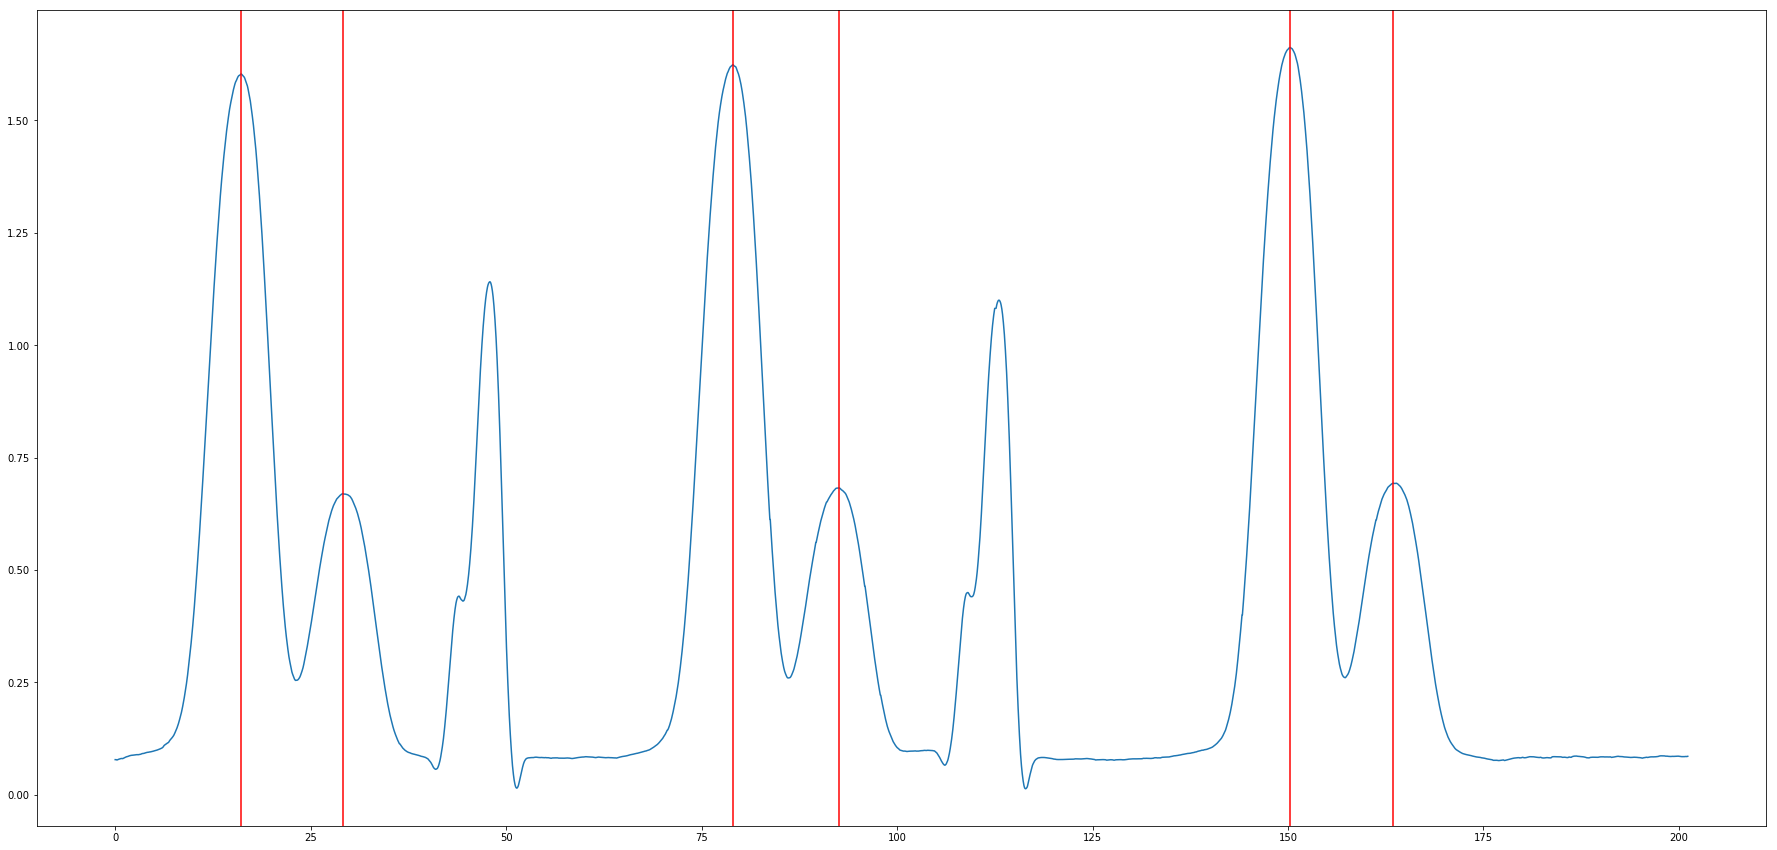

In [54]:
plt.figure(figsize=(31,15), facecolor='w')
plt.plot(#df.ds, df.nA,
    df.ds, yhat)
xcoords = [0.22058956, 0.33088437, 2.20589566]
for xc in xmax_2:
    plt.axvline(x=xc, color = 'r')
plt.show()

In [19]:
xmax = [indexes[i] for i in ind]
dfpeaks = df.iloc[xmax].reset_index(drop = True)

In [20]:
dfpeaks

,ds,nA,yhat
0,16.111800,1.596653,1.603584
1,29.090784,0.676383,0.669798
2,79.000640,1.614163,1.624166
3,92.537912,0.702769,0.682648
4,150.281024,1.649025,1.662505
5,163.470688,0.734717,0.692980


Calculating isotope shifts

In [21]:
diff = []
for i in range(1,int(len(dfpeaks)/2) + 1):
    d = (dfpeaks.ds[i*2-1] - dfpeaks.ds[i*2-2])/12
    diff.append(d)
    

In [22]:
print(diff)
avg = sum(diff)/len(diff)
print(avg)
print()

[1.0815819999999998, 1.1281059999999978, 1.099138666666666]
1.1029422222222214



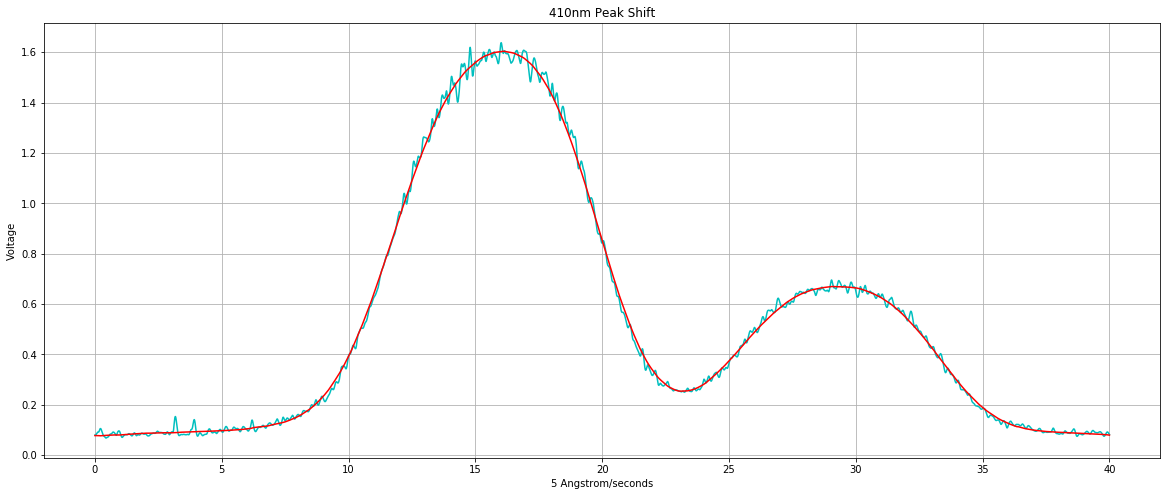

In [114]:
plt.figure(figsize=(20,8))
plt.plot(dfx.ds, dfx.nA, 'c')
plt.plot(dfx.ds, dfx.yhat, 'r')

#indexes = peakutils.indexes(yhat, thres=0.25, min_dist=10000)

#xmax = [dfx.ds[i] for i in indexes]
#plt.plot(#df.ds, df.nA,
#    dfx.ds, yhat)


#for xc in xmax:
#    plt.axvline(x=xc)
#ind = 0,1
#xmax_2 = [xmax[i] for i in ind]



plt.title("410nm Peak Shift")
plt.xlabel('5 Angstrom/seconds')
plt.ylabel('Voltage')
plt.grid()
plt.show()

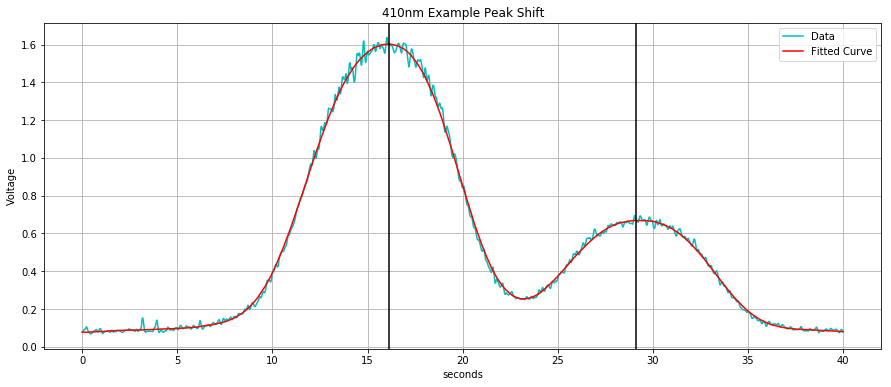

In [118]:
indi = 0,1
xmax_3= [xmax[i] for i in indi]
plt.figure(figsize=(15,6), facecolor='w')
plt.plot(dfx.ds, dfx.nA, 'c', label = 'Data')
plt.plot(dfx.ds, dfx.yhat, 'r', label = 'Fitted Curve')
for xc in xmax_3:
    plt.axvline(x=xc, color = 'k')

    
plt.title("410nm Example Peak Shift")
plt.xlabel('seconds')
plt.ylabel('Voltage')

#bbox_props = dict(boxstyle="rarrow,pad=0.3", fc="white", ec="b", lw=2)
#t = plt.text(20, 0.2, "Shift", ha="center", va="center", rotation=0,
#            size=30,
#            bbox=bbox_props)
#bb = t.get_bbox_patch()
#bb.set_boxstyle('darrow', pad=.1)


plt.legend(loc=1)
plt.grid()
plt.show()

In [120]:
1.186*12

14.232

In [1]:
0.012*12

0.14400000000000002